In [1]:
##Independent Data Science Project Part 4 by Zara Clacken
#Goal: Create a Dashboard for the charts Poverty By Race, U.S. Children in Single-Parent Homes by Race, and Degree Completion By Race

In [2]:
#Import Packages
import warnings
warnings.filterwarnings('ignore')  
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Import Data Frames
singleparentkids = pd.read_csv('C:\\Users\zara\Documents/Data Science Portfolio_Zara Clacken/Created CSV Files/2010-2019_Single_Parent_Children_By_Race.csv')
poverty = pd.read_csv('C:\\Users\zara\Documents/Data Science Portfolio_Zara Clacken/Created CSV Files/2013-2018_Poverty_By_Race.csv')
education = pd.read_csv('C:\\Users\zara\Documents/Data Science Portfolio_Zara Clacken/Created CSV Files/2012-2017_Degrees_Completed_By_Race.csv')

---

In [4]:
#Children in Single Parent Homes by Race Data Frame

In [5]:
singleparentkids.columns

Index(['Unnamed: 0', 'Race', 'Year', 'Number of Children(Single Parent Homes)',
       'Percent of Total Children(Single Parent Homes)'],
      dtype='object')

In [6]:
#Drop Unnamed 0 column
#Print Single Parent Children Data Frame
singleparentkids = singleparentkids.drop('Unnamed: 0',axis = 1)

In [7]:
#Change Data Types. Make Race and Year categorical variables.  
singleparentkids.Race = singleparentkids.Race.astype('category')
singleparentkids.Year = singleparentkids.Year.astype('category')
singleparentkids.info('columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Race                                            60 non-null     category
 1   Year                                            60 non-null     category
 2   Number of Children(Single Parent Homes)         60 non-null     int64   
 3   Percent of Total Children(Single Parent Homes)  60 non-null     float64 
dtypes: category(2), float64(1), int64(1)
memory usage: 1.8 KB


In [8]:
sorted(singleparentkids.Year.unique().tolist())

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [9]:
yearlist = [2010, 2011, 2012, 2018, 2019]
for y in yearlist:
    index_year = singleparentkids[singleparentkids.Year == y].index
    singleparentkids.drop(index_year, inplace = True)

In [10]:
sorted(singleparentkids.Year.unique().tolist())

[2013, 2014, 2015, 2016, 2017]

---

In [11]:
#Poverty Population By Race Data Frame

In [12]:
poverty.columns

Index(['Unnamed: 0', 'Race', 'Year', 'Poverty Population',
       'Percent of Total Poverty Population'],
      dtype='object')

In [13]:
poverty = poverty.drop('Unnamed: 0',axis = 1)

In [14]:
#Change Data Types. Make Race and Year categorical variables.  
poverty.Race = poverty.Race.astype('category')
poverty.Year = poverty.Year.astype('category')
poverty.info('columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Race                                 36 non-null     category
 1   Year                                 36 non-null     category
 2   Poverty Population                   36 non-null     int64   
 3   Percent of Total Poverty Population  36 non-null     float64 
dtypes: category(2), float64(1), int64(1)
memory usage: 1.2 KB


In [15]:
poverty.Year = poverty.Year.astype('category')

In [16]:
poverty.Year.unique()

[2013, 2014, 2015, 2016, 2017, 2018]
Categories (6, int64): [2013, 2014, 2015, 2016, 2017, 2018]

In [17]:
#Show only 2013-2017
index_year = poverty[poverty.Year == 2018 ].index
poverty.drop(index_year, inplace = True)

In [18]:
poverty.Year.unique().tolist()

[2013, 2014, 2015, 2016, 2017]

---

In [19]:
#Degrees Completed by Race Data Frame

In [20]:
education.columns

Index(['Unnamed: 0', 'Race', 'Year', 'Degrees Completed',
       'Percent of Total Degrees'],
      dtype='object')

In [21]:
education = education.drop('Unnamed: 0',axis = 1)

In [22]:
#Change Data Types. Make Race and Year categorical variables.  
education.Race = education.Race.astype('category')
education.Year = education.Year.astype('category')
education.info('columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Race                      36 non-null     category
 1   Year                      36 non-null     category
 2   Degrees Completed         36 non-null     int64   
 3   Percent of Total Degrees  36 non-null     float64 
dtypes: category(2), float64(1), int64(1)
memory usage: 1.2 KB


In [23]:
education.Year.unique()

[2017, 2016, 2015, 2014, 2013, 2012]
Categories (6, int64): [2017, 2016, 2015, 2014, 2013, 2012]

In [24]:
index_year = education[education.Year == 2012 ].index
education.drop(index_year, inplace = True)

In [25]:
sorted(education.Year.unique(), reverse = False)

[2013, 2014, 2015, 2016, 2017]

---

In [26]:
#Create Dashboard

In [246]:
#Edit plot functions 

#Lists and Dictionaries for all plots 
racelist = sorted(['Native American', 'Asian and Pacific Islander', 'Black', 'Hispanic', 'White', 'Multiracial'])
LineColor = {'Native American':'Red', 'Asian and Pacific Islander': 'Gold', 'Black':'Black',
             'Hispanic':'Orange', 'White': 'Pink', 'Multiracial': 'Brown' }
LineMarker = {'Native American':'s', 'Asian and Pacific Islander': 'o', 'Black':'^',
             'Hispanic':'s', 'White': 'o', 'Multiracial': '^' }

#Kidsplot Function Edited for Subplot  
def kidsplot():
    for race in racelist:
        sns.lineplot(data = singleparentkids[singleparentkids.Race == race], x = 'Year', y = 'Percent of Total Children(Single Parent Homes)',
                     c= LineColor[race], marker = LineMarker[race], markersize = 8)
    plt.title("Children in Single-Parent Homes", fontsize = 13)
    plt.ylabel('', fontsize = 12)
    plt.xlabel('', fontsize = 12)
    plt.locator_params(axis="x", nbins=5)
    plt.show
plt.rcParams['figure.figsize'] = (5,5)

#Povertyplot Function Edited for Subplot 
def povertyplot():
    for race in racelist:
        sns.lineplot(data = poverty[poverty.Race == race], x = 'Year', y = 'Percent of Total Poverty Population',
                     c= LineColor[race], marker = LineMarker[race], markersize = 8 )
    plt.title("Living In Poverty", fontsize = 13)
    plt.ylabel('', fontsize = 12)
    plt.xlabel('', fontsize = 12)
    plt.ylim = (0,70)
    plt.locator_params(axis="x", nbins=5)
    plt.show
plt.rcParams['figure.figsize'] = (5,5)

#Education Plot Function Edited for Subplot
def educationplot():
    for race in racelist:
        sns.lineplot(data = education[education.Race == race], x = 'Year', y = 'Percent of Total Degrees',
                     c= LineColor[race], marker = LineMarker[race], markersize = 8 )
    plt.title("Degree Completion", fontsize = 13)
    plt.ylabel('', fontsize = 12)
    plt.xlabel('', fontsize = 12)
    plt.locator_params(axis="x", nbins=5)
    plt.show
plt.rcParams['figure.figsize'] = (5,5)


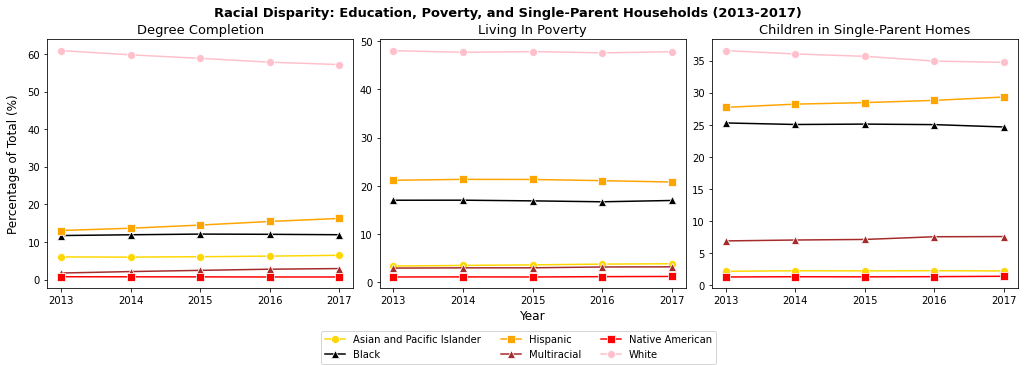

In [310]:

#Create Dashboard
fig,axes= plt.subplots(1, 3, figsize = (15,5))
plt.subplot(1,3,3)
kidsplot()
plt.subplot(1,3,2)
povertyplot()
plt.subplot(1,3,1)
educationplot()


#Add Labels for X and Y axes of Figure 
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.ylabel("Percentage of Total (%)", fontsize = 12)
plt.xlabel("Year", fontsize = 12)

# Add Title and Underline It
underline = '\33[4m'

plt.suptitle('Racial Disparity: Education, Poverty, and Single-Parent Households (2013-2017)',  fontsize = 13, fontweight = 'bold',
             horizontalalignment = 'center') 


#Control Spacing Between Subplots and Global Title 
#Increasing pad number increases spacing
fig.tight_layout(pad=2,w_pad=0.5)

#Add Legend
racelist = sorted(['Native American', 'Asian and Pacific Islander', 'Black', 'Hispanic', 'White', 'Multiracial'])
plt.figlegend(labels = racelist, prop={'size': 10}, loc = 'center', bbox_to_anchor = (0.48,0.05), ncol = 3)


#Print Plot
plt.show()

6

Test Underline


'\x1bTest Underline'